### Imports

In [1]:
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from transformer import Transformer

### Artificial Time Series

In [2]:
sequence = np.sin(np.arange(0,20,1))
sequence

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849,
       -0.54402111, -0.99999021, -0.53657292,  0.42016704,  0.99060736,
        0.65028784, -0.28790332, -0.96139749, -0.75098725,  0.14987721])

### Test Data Loader

In [3]:
from utils import load_src_trg

In [4]:
data_iter = load_src_trg(sequence, 5, 5, 1)

In [14]:
for src, trg, trg_y in data_iter:
    print(src)
    print(trg)
    print(trg_y)
    print('-------')
    break

tensor([[ 0.0000,  0.8415,  0.9093,  0.1411, -0.7568]], dtype=torch.float64)
tensor([[-0.7568, -0.9589, -0.2794,  0.6570,  0.9894]], dtype=torch.float64)
tensor([[-0.9589, -0.2794,  0.6570,  0.9894,  0.4121]], dtype=torch.float64)
-------


### Test Training

In [6]:
model = Transformer(pred_offset = 5,
                    input_size = 1,
                    output_size = 1,
                    max_seq_length = 5,
                    embedding_size = 3,
                    num_basic_encoders = 2,
                    num_atten_heads = 1,
                    num_basic_decoders = 2)

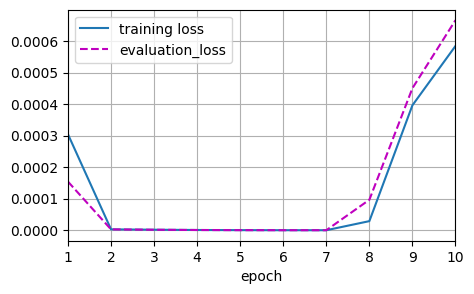

In [13]:
model.start_training(sequence=sequence.reshape(-1, 1),
                     loss=nn.MSELoss(),
                     metric=nn.MSELoss(),
                     epochs=10,
                     batch_size=2,
                     num_warmup_steps=100,
                     optimizer_params={'beta1':0.1, 'beta2': 0.1, 'epsilon': 0.1},
                     standardize=True,
                     verbose=True,
                     plot=True)